In [1]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import seaborn as sns
from tqdm import tqdm
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
file_location = "dataset/STANDARD_VALUES.csv"

df = pd.read_csv(file_location)
df.drop(['Unnamed: 0'],inplace=True,axis=1)
x = df.iloc[:,1:8700]

In [3]:
df.set_index('name',inplace=True)

In [4]:
cluster_number = 74
kmeans = KMeans(cluster_number)
kmeans.fit(df)

identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([58, 40, 30, ..., 55,  0,  0], dtype=int32)

In [5]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

In [6]:
data_with_clusters.head()

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,Clusters
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.205874,0.001158,0.000000,0.000000,0.003592,0.002065,0.000000,0.0,0.000000,0.000000,...,0.000320,0.000519,0.001446,0.000000,0.0,0.006408,0.0,0.0,0.018800,58
"Nuts, pecans",0.026150,0.058405,0.015460,0.000000,0.000000,0.014645,0.004273,0.0,0.002939,0.015261,...,0.015411,0.092622,0.087541,0.000000,0.0,0.007430,0.0,0.0,0.000557,40
"Eggplant, raw",0.004448,0.000763,0.000000,0.000000,0.000263,0.011730,0.020090,0.0,0.007684,0.023360,...,0.000399,0.000171,0.001447,0.000000,0.0,0.015471,0.0,0.0,0.068669,30
"Teff, uncooked",0.016932,0.002373,0.001216,0.000000,0.000409,0.005775,0.000000,0.0,0.010326,0.020307,...,0.001365,0.001630,0.005288,0.000000,0.0,0.014407,0.0,0.0,0.001702,33
"Sherbet, orange",0.044168,0.013149,0.024252,0.001792,0.010422,0.022568,0.006297,0.0,0.001286,0.032104,...,0.023444,0.009751,0.002626,0.001792,0.0,0.016165,0.0,0.0,0.084783,43


In [8]:
df['color']=identified_clusters

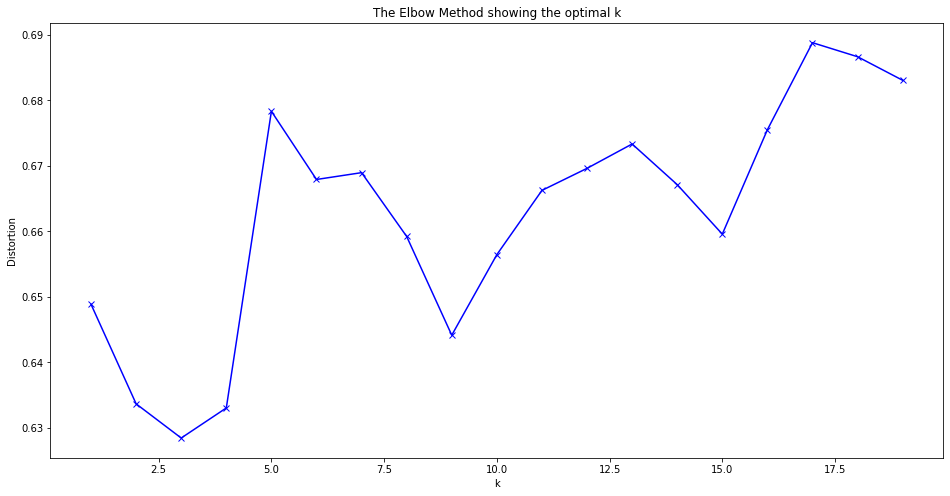

In [9]:
silhouette_coefficients = []
from sklearn.metrics import silhouette_score
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
k = range(1,20)
plt.figure(figsize=(16,8))
plt.plot(k, silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
data = df
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(data.iloc[:,:-1]) 
# storing t-sne information into dataframe
dff = pd.DataFrame()
dff["tsne-1"] = z[:,0]
dff["tsne-2"] = z[:,1]
# adding labels to dataframe
dff['color'] = data.color.tolist()

''' Plot'''
# Color sequences
palette = sns.color_palette("bright", cluster_number)
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x='tsne-1', y='tsne-2',palette=palette, hue="color", data=dff, s=30)
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend()
plt.title('tsne for cluster '+str(10))
# plt.show()

/Users/rajesh/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rajesh/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8789 samples in 0.001s...
[t-SNE] Computed neighbors for 8789 samples in 1.465s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8789
[t-SNE] Computed conditional probabilities for sample 2000 / 8789
[t-SNE] Computed conditional probabilities for sample 3000 / 8789
[t-SNE] Computed conditional probabilities for sample 4000 / 8789
[t-SNE] Computed conditional probabilities for sample 5000 / 8789
[t-SNE] Computed conditional probabilities for sample 6000 / 8789
[t-SNE] Computed conditional probabilities for sample 7000 / 8789
[t-SNE] Computed conditional probabilities for sample 8000 / 8789
[t-SNE] Computed conditional probabilities for sample 8789 / 8789
[t-SNE] Mean sigma: 0.025695


/Users/rajesh/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rajesh/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/var/folders/0l/3dbf2xv17652zysy4_jjmb0w0000gn/T/ipykernel_55776/3517926363.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


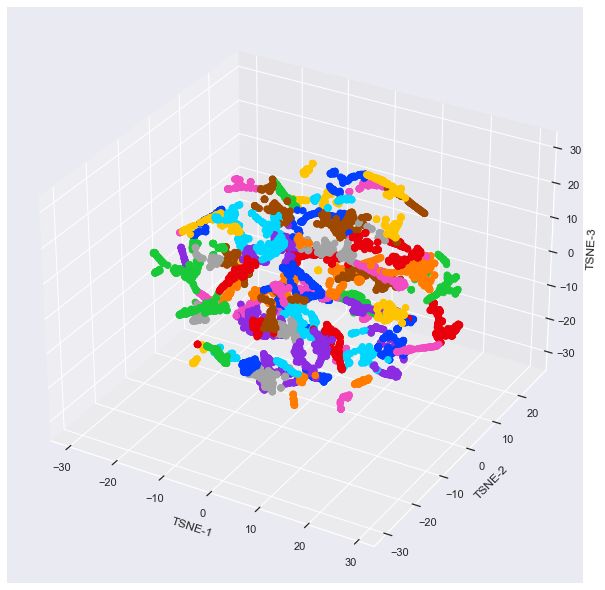

In [44]:
tsne = TSNE(n_components=3)
z = tsne.fit_transform(data_with_clusters.iloc[:,:-1]) 
# storing t-sne information into dataframe
df1 = pd.DataFrame()
df1["tsne-1"] = z[:,0]
df1["tsne-2"] = z[:,1]
df1["tsne-3"] = z[:,2]
sns.set(style = "darkgrid")
# adding labels to dataframe
df1['color'] = df.color.tolist()
# Color sequences
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
fig.add_axes(ax)

''' Plot'''
cmap = ListedColormap(sns.color_palette("bright").as_hex())
sc = ax.scatter(df1["tsne-1"], df1["tsne-2"], df1["tsne-3"], s=40,c=df1['color'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('TSNE-1')
ax.set_ylabel('TSNE-2')
ax.set_zlabel('TSNE-3')
plt.savefig('tsne_'+'d_'+'70'+'c.png')